In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('purchase_data_exe.csv')

In [3]:
df.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Unnamed: 7
0,20/11/2018,37077,505,credit,49.53,12.0,8,NaN
1,20/11/2018,59173,509,paypal,50.61,25.9,8,NaN
2,20/11/2018,41066,507,credit,85.99,34.9,11,NaN
3,20/11/2018,50741,506,credit,34.60,16.5,9,NaN
4,20/11/2018,53639,515,paypal,266.27,43.1,30,NaN


In [4]:
df.drop(['Unnamed: 7'], axis=1, inplace=True)

In [5]:
df.head()

,date,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site
0,20/11/2018,37077,505,credit,49.53,12.0,8
1,20/11/2018,59173,509,paypal,50.61,25.9,8
2,20/11/2018,41066,507,credit,85.99,34.9,11
3,20/11/2018,50741,506,credit,34.60,16.5,9
4,20/11/2018,53639,515,paypal,266.27,43.1,30


In [6]:
df['payment_method'] = df['payment_method'].astype('category').cat.codes
#Now 0 represents credit and 1 represents paypal

In [7]:
df['payment_method'] = df['payment_method'].astype('int')

In [8]:
df.dtypes

date                       object
customer_id                 int64
product_category            int64
payment_method              int32
value [USD]               float64
time_on_site [Minutes]    float64
clicks_in_site              int64
dtype: object

In [9]:
from datetime import datetime

#df['DateTime'] = pd.to_datetime(df['date'])
df['Year']=[d.split('/')[2] for d in df.date]
df['Month']=[d.split('/')[1] for d in df.date]
df['Day']=[d.split('/')[0] for d in df.date]
df.Year = df.Year.astype('int')
df.Month = df.Month.astype('int')
df.Day = df.Day.astype('int')
df.drop(['date'], axis = 1, inplace= True)

In [10]:
df.head()

,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Year,Month,Day
0,37077,505,0,49.53,12.0,8,2018,11,20
1,59173,509,1,50.61,25.9,8,2018,11,20
2,41066,507,0,85.99,34.9,11,2018,11,20
3,50741,506,0,34.60,16.5,9,2018,11,20
4,53639,515,1,266.27,43.1,30,2018,11,20


In [11]:
df.dtypes

customer_id                 int64
product_category            int64
payment_method              int32
value [USD]               float64
time_on_site [Minutes]    float64
clicks_in_site              int64
Year                        int32
Month                       int32
Day                         int32
dtype: object

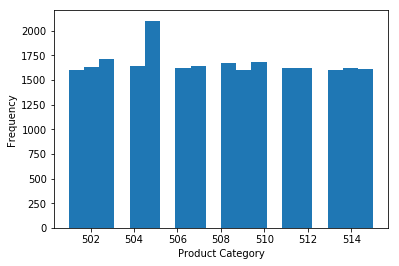

In [15]:
plt.hist(df.product_category, bins = 20)
plt.xlabel("Product Category")
plt.ylabel("Frequency")
plt.show()

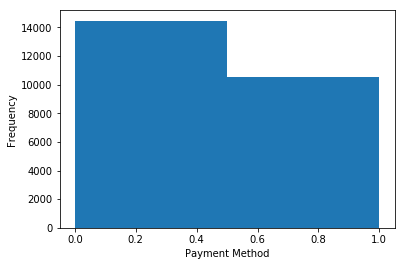

In [16]:
plt.hist(df.payment_method, bins = 2)
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.show()

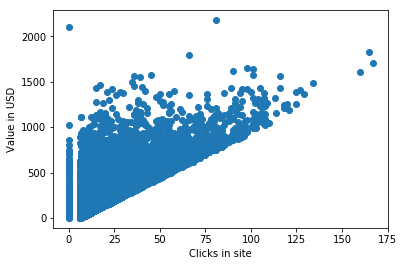

In [17]:
plt.scatter(x = df["clicks_in_site"], y = df["value [USD]"])
plt.xlabel("Clicks in site")
plt.ylabel("Value in USD")
plt.show()

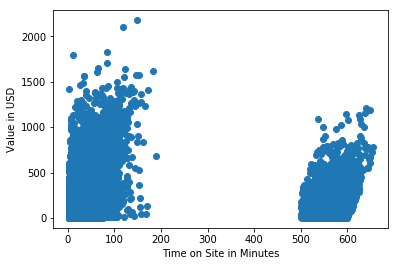

In [18]:
plt.scatter(x = df["time_on_site [Minutes]"], y = df["value [USD]"])
plt.xlabel("Time on Site in Minutes")
plt.ylabel("Value in USD")
plt.show()

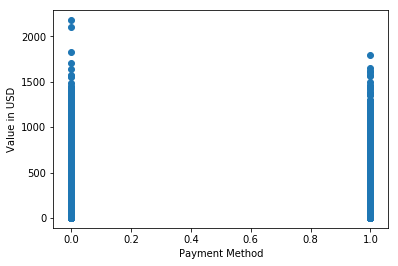

In [19]:
plt.scatter(x = df["payment_method"], y = df["value [USD]"])
plt.xlabel("Payment Method")
plt.ylabel("Value in USD")
plt.show()

In [20]:
new=df.groupby("payment_method")["value [USD]"]
new.mean()

payment_method
0    210.364136
1    193.487741
Name: value [USD], dtype: float64

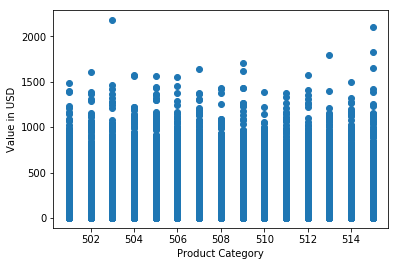

In [21]:
plt.scatter(x = df["product_category"], y = df["value [USD]"])
plt.xlabel("Product Category")
plt.ylabel("Value in USD")
plt.show()

In [22]:
new=df.groupby("product_category")["value [USD]"]
new.mean()

product_category
501    199.054377
502    195.705785
503    202.185715
504    197.795738
505    210.866029
506    213.855764
507    206.942325
508    207.243236
509    195.317299
510    201.812917
511    193.090283
512    200.309036
513    209.927803
514    203.935415
515    208.461937
Name: value [USD], dtype: float64

In [23]:
#df.payment_method.plot(kind='bar')
#plt.show()

In [24]:
new=df.groupby("Day")["value [USD]"]
new.sum()

Day
20     400931.17
21     380325.39
22     401496.13
23    1884586.16
24      63113.88
25     391050.31
26     400089.83
27     368068.34
28     400497.18
29     390857.44
Name: value [USD], dtype: float64

In [25]:
#So, maximum earning was on 23 November 2018 and minimum was on 24 November 2018.

In [26]:
df.corr()

,customer_id,product_category,payment_method,value [USD],time_on_site [Minutes],clicks_in_site,Year,Month,Day
customer_id,1.000000,0.007768,0.007744,0.007141,-0.017763,0.001560,NaN,NaN,-0.012773
product_category,0.007768,1.000000,0.002057,0.004948,-0.001945,0.003303,NaN,NaN,0.003903
payment_method,0.007744,0.002057,1.000000,-0.040064,0.043544,-0.037943,NaN,NaN,0.073963
value [USD],0.007141,0.004948,-0.040064,1.000000,0.042967,0.768820,NaN,NaN,-0.046736
time_on_site [Minutes],-0.017763,-0.001945,0.043544,0.042967,1.000000,0.035003,NaN,NaN,0.418273
clicks_in_site,0.001560,0.003303,-0.037943,0.768820,0.035003,1.000000,NaN,NaN,-0.033241
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day,-0.012773,0.003903,0.073963,-0.046736,0.418273,-0.033241,NaN,NaN,1.000000
